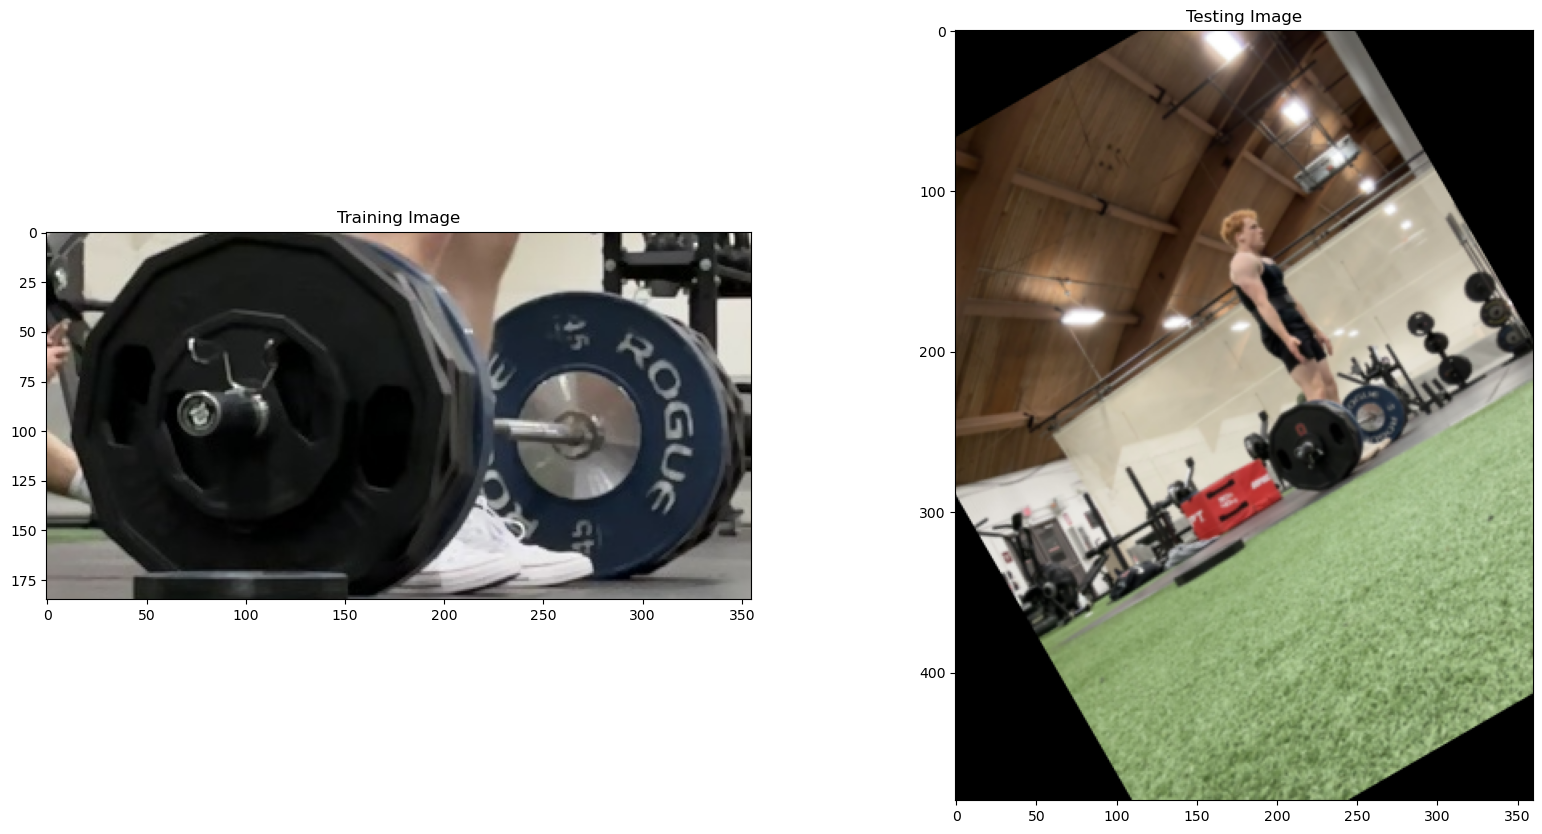

In [69]:
import cv2
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the image
bar_template = np.array(io.imread('./deadlift1/bar.png'),dtype='uint8')
bar_template = bar_template[:,:,0:3]
bar_template_gray = np.array(io.imread('./deadlift1/bar.png',as_gray=True))
bar_template_gray = 255 * bar_template_gray 
bar_template_gray = bar_template_gray.astype(np.uint8)


#Import and alter first frame of video, note this is the video not from the original
search = np.array(io.imread('deadlift2_10fps/frame0.jpg'))
search_gray = np.array(io.imread('deadlift2_10fps/frame0.jpg',as_gray=True))
search_gray = 255 * search_gray 
search_gray = search_gray.astype(np.uint8)
# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(search)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(bar_template)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

array([[215, 211, 168, ...,  56, 113, 220],
       [208, 182, 132, ...,  49,  98, 214],
       [183, 142, 128, ...,  44,  85, 210],
       ...,
       [138, 139, 138, ..., 155, 156, 156],
       [136, 136, 136, ..., 155, 156, 156],
       [135, 136, 136, ..., 155, 156, 157]], dtype=uint8)

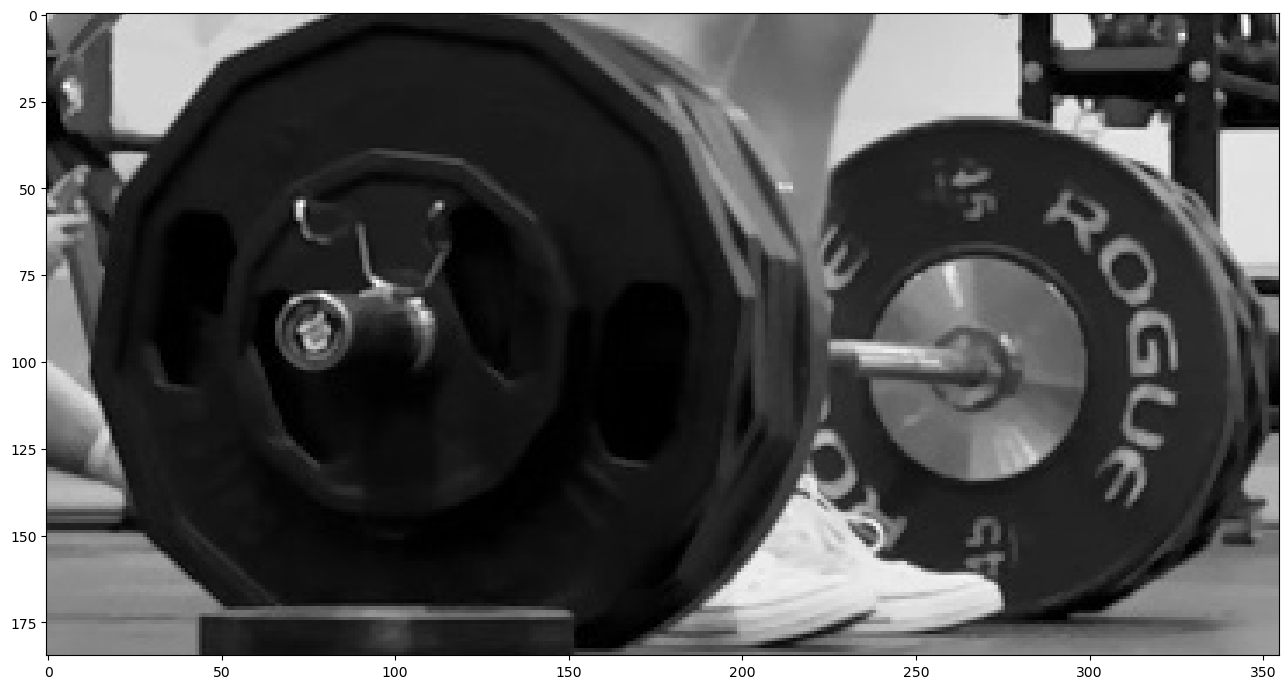

In [70]:
io.imshow(bar_template_gray)
bar_template_gray

Number of Keypoints Detected In The Training Image:  376
Number of Keypoints Detected In The Query Image:  24603


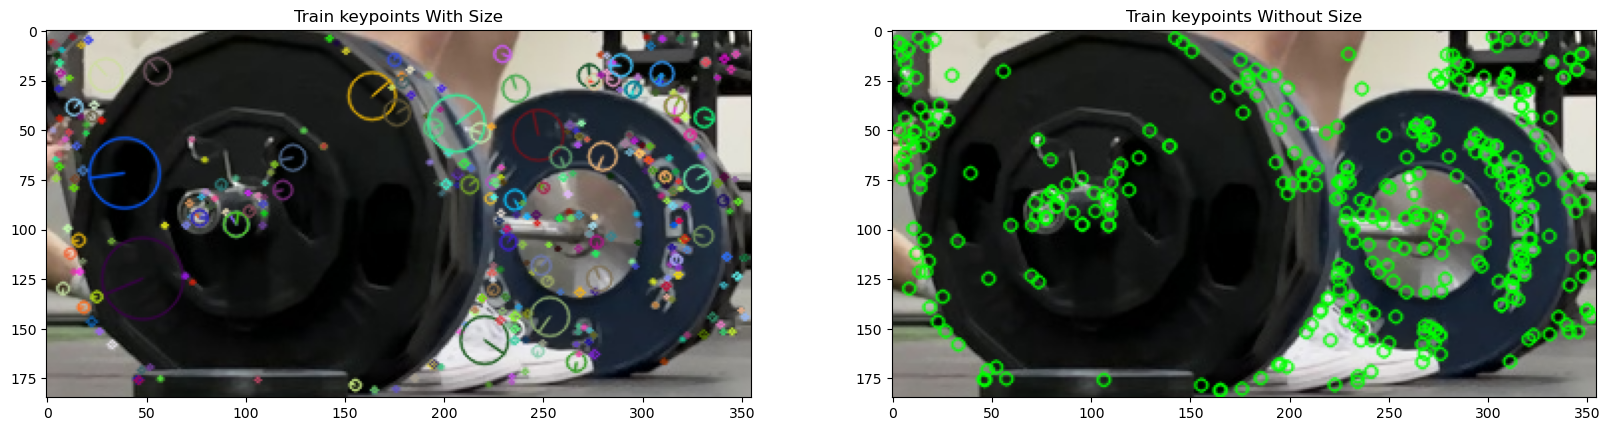

In [71]:
sift = cv2.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(bar_template_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(search_gray, None)

keypoints_without_size = np.copy(bar_template)
keypoints_with_size = np.copy(bar_template)

cv2.drawKeypoints(bar_template, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(bar_template, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

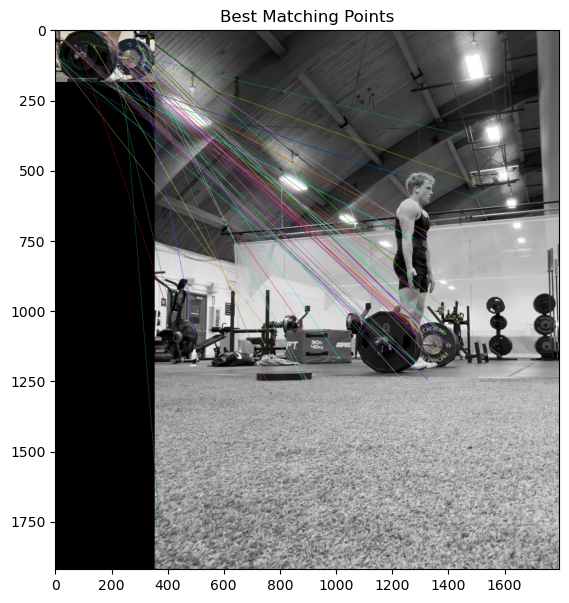


Number of Matching Keypoints Between The Training and Query Images:  376


In [101]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck = False)
# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

i = 0
while i < len(matches) and matches[i].distance < 200:
    i += 1
    
result = cv2.drawMatches(bar_template, train_keypoints, search_gray, test_keypoints, matches[:70], search_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()
# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))